## 20일차 강의 (2021.7.30)
# 머신러닝

### 연습문제
- 아이리스 데이터를 학습데이터/테스트데이터로 분리하려고 한다.
- 100개를 학습데이터로, 50개를 테스트데이터로 분리하시오. (np.random 사용)
> X_train, y_train, X_test, y_test
- kNN 에서 학습데이터로 훈련을 한 후, 테스트 데이터로 검증해 보시오.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [8]:
X = df.values
y = np.array([0]*50+[1]*50+[2]*50)
X.shape, y.shape

((150, 4), (150,))

In [9]:
idx = np.random.permutation(range(150)) # 번호를 섞는다
idx

array([ 61,  85,  71,  20,  90, 114, 116,  42, 107, 130,  22,  98,  13,
        49, 144,  41,   5, 100,  84, 103, 146, 143, 110, 138,   3, 111,
       139,  75,  30,  24,  76,  25,  86, 140, 106,  74,   7, 135, 147,
       126,   6,  44,  65,  36,  35, 109, 145,  17,  21,  19, 113,  55,
        52,  97,  15,  31, 149,   9, 108,  96,  48, 120, 131,  32, 121,
        47,  77,  87,  63, 105,  91,  81,  27, 102, 134,  14, 129, 133,
        18,   8,  68,  43,  82,  46,  70,  79,  16, 117,  94, 141,   0,
        40, 132,  78,  93,  66,  62,  92,  53,  59,  80,  38, 128,  72,
        64,  10,  83, 136,  54, 101,  23, 112,  34,  51,   2,  73,  89,
        60, 115,  33,  28,  99, 127, 123,  57,  56, 137,  11,  88,  95,
        45, 124, 148,  26,  39,   4, 118, 125, 122,  37,  29,  58, 104,
       142,  69,  67,  50,   1,  12, 119])

In [10]:
X_train = X[idx[:100]]
y_train = y[idx[:100]]

In [11]:
X_test = X[idx[100:]]
y_test = y[idx[100:]]

In [12]:
X_train.shape, y_test.shape, X_test.shape, y_test.shape

((100, 4), (50,), (50, 4), (50,))

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
pred_y = model.predict(X_test)
pred_y

array([1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2,
       1, 1, 1, 0, 0, 2])

In [16]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2,
       1, 1, 1, 0, 0, 2])

In [17]:
(pred_y!=y_test).sum()

2

In [18]:
model.score(X_test, y_test)

0.96

In [21]:
(pred_y==y_test).mean()

0.98

In [19]:
iris = np.c_[X, y]
iris

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [20]:
iris2 = np.random.permutation(iris)
iris2

array([[7.4, 2.8, 6.1, 1.9, 2. ],
       [6.3, 2.8, 5.1, 1.5, 2. ],
       [6.9, 3.1, 5.1, 2.3, 2. ],
       [7.6, 3. , 6.6, 2.1, 2. ],
       [6. , 3. , 4.8, 1.8, 2. ],
       [6. , 3.4, 4.5, 1.6, 1. ],
       [5. , 3.2, 1.2, 0.2, 0. ],
       [5.7, 2.6, 3.5, 1. , 1. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [6.7, 3.1, 4.4, 1.4, 1. ],
       [5.6, 2.5, 3.9, 1.1, 1. ],
       [6.3, 2.9, 5.6, 1.8, 2. ],
       [7.7, 2.8, 6.7, 2. , 2. ],
       [5.1, 2.5, 3. , 1.1, 1. ],
       [6.1, 2.6, 5.6, 1.4, 2. ],
       [5.9, 3.2, 4.8, 1.8, 1. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [5.5, 2.5, 4. , 1.3, 1. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.5, 2.3, 1.3, 0.3, 0. ],
       [5.5, 4.2, 1.4, 0.2, 0. ],
       [5.6, 3. , 4.1, 1.3, 1. ],
       [6.9, 3.1, 4.9, 1.5, 1. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [6.5, 2.8, 4.6, 1.5, 1. ],
       [5. , 3.5, 1.3, 0.3, 0. ],
       [6.1, 2.8, 4. , 1.3, 1. ],
       [5.7, 2.8, 4.5, 1.3, 1. ],
       [7.2, 3

In [21]:
X_train = iris2[:100,:-1]
y_train = iris2[:100,-1]
X_test = iris2[100:, :-1]
y_test = iris2[100:, -1]

### 학습/테스트 데이터셋 분리

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [25]:
150*0.75 # default 로 75% 를 학습데이터에 할당함

112.5

In [26]:
y_train

array([2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1,
       0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0,
       0, 2, 1, 0, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1,
       1, 0])

In [27]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [28]:
from sklearn.datasets import load_iris

In [29]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [30]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [34]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [35]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

### 유방암 데이터

In [37]:
from sklearn.datasets import load_breast_cancer

In [38]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [39]:
cancer.data.shape

(569, 30)

In [40]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [41]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

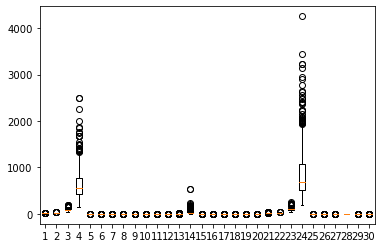

In [42]:
plt.boxplot(cancer.data); pass

(0.0, 10.0)

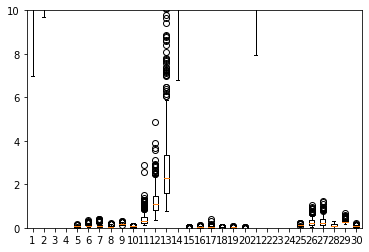

In [43]:
plt.boxplot(cancer.data)
plt.ylim(0,10)

In [44]:
for i in cancer.data.mean(axis=0):
    print('%.2f' % i)

14.13
19.29
91.97
654.89
0.10
0.10
0.09
0.05
0.18
0.06
0.41
1.22
2.87
40.34
0.01
0.03
0.03
0.01
0.02
0.00
16.27
25.68
107.26
880.58
0.13
0.25
0.27
0.11
0.29
0.08


In [45]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [48]:
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
model.score(X_test, y_test)

0.958041958041958

In [50]:
# malignant ??개, benign: ??개
cancer.target.sum() # benign 의 갯수

357

In [51]:
len(cancer.target) - 357

212

In [52]:
(1-cancer.target).sum() # malignant 의 갯수

212

In [53]:
np.bincount(cancer.target) # 0의 갯수, 1의 갯수, ...

array([212, 357], dtype=int64)

In [54]:
np.bincount([10,11,12,11,10,10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1], dtype=int64)

In [55]:
X = cancer.data
y = cancer.target

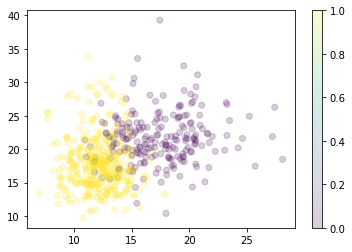

In [56]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.2)
plt.colorbar()

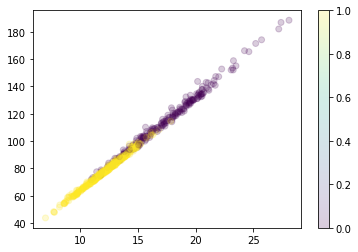

In [57]:
plt.scatter(X[:,0], X[:,2], c=y, alpha=0.2)
plt.colorbar()

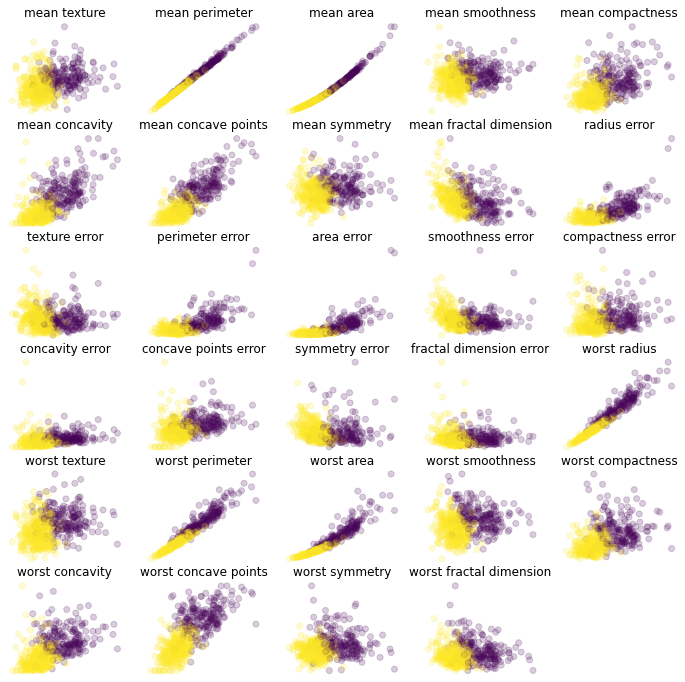

In [58]:
# 첫번째 속성과 나머지 속성(1~29) 과의 산점도 29개를 그리시오. (subplot 사용)
plt.figure(figsize=[12,12])

for i in range(1,30):
    plt.subplot(6,5,i)
    plt.scatter(X[:,0],X[:,i], c=y, alpha=0.2)
    plt.title(cancer.feature_names[i])
    plt.axis('off')

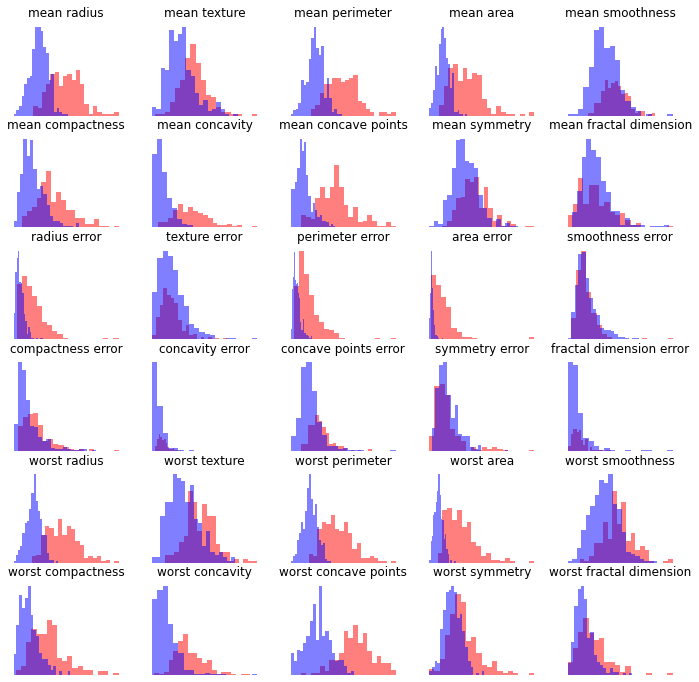

In [59]:
# 각 속성별로 히스토그램을 그려보시오. (총 30개)
plt.figure(figsize=[12,12])
malignant = X[y==0]
benign = X[y==1]

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.hist(malignant[:,i], bins=20, color='red', alpha=0.5)
    plt.hist(benign[:,i], bins=20, color='blue', alpha=0.5)
    plt.title(cancer.feature_names[i])
    plt.axis('off')

### 정규화
- 유방암 데이터는 정규화가 꼭 필요하다!

In [83]:
X = cancer.data
y = cancer.target

In [84]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
X_norm.shape

(569, 30)

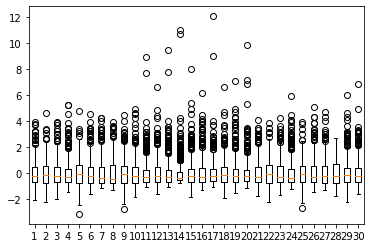

In [86]:
plt.boxplot(X_norm); pass

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [88]:
X_train_norm = (X_train-X_train.mean(axis=0))/X_train.std(axis=0)

In [90]:
X_test_norm = (X_test-X_train.mean(axis=0))/X_train.std(axis=0)

In [91]:
# kNN 을 적용하여 점수를 확인한다
model = KNeighborsClassifier() # default=5
model.fit(X_train_norm, y_train)

KNeighborsClassifier()

In [92]:
model.score(X_test_norm, y_test)

0.9790209790209791

In [94]:
model.score(X_train_norm, y_train)

0.9694835680751174

In [95]:
model = KNeighborsClassifier(1)
model.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=1)

In [96]:
model.score(X_test_norm, y_test)

0.958041958041958

In [97]:
model.score(X_train_norm, y_train)

1.0

In [99]:
ks = [1,3,5,7,9,11]
scores_train = []
scores_test = []

for k in ks:
    model = KNeighborsClassifier(k)
    model.fit(X_train_norm, y_train)
    s = model.score(X_train_norm, y_train)
    scores_train.append(s)
    s = model.score(X_test_norm, y_test)
    scores_test.append(s)
    
display(scores_train, scores_test)

[1.0,
 0.9812206572769953,
 0.9694835680751174,
 0.9694835680751174,
 0.9741784037558685,
 0.971830985915493]

[0.958041958041958,
 0.965034965034965,
 0.9790209790209791,
 0.965034965034965,
 0.9790209790209791,
 0.9790209790209791]

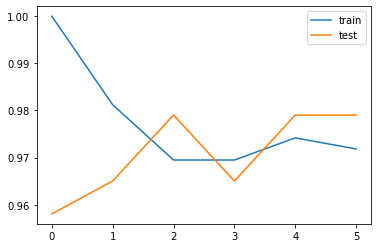

In [100]:
plt.plot(scores_train)
plt.plot(scores_test)
plt.legend(['train', 'test'])